<a href="https://colab.research.google.com/github/harishahamed26/Fashion-MNIST/blob/main/Fashion_MNIST_Image_Classificaiton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Importing of necessary libraries


import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from tqdm import tqdm

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

# defining the constant dimension 

Const_Dim = (200, 200)
RANDOM_SEED = 100

In [32]:
df_MNIST =tf.keras.datasets.fashion_mnist.load_data() 
(X_train, Y_train), (X_test,Y_test) = tf.keras.datasets.fashion_mnist.load_data() 

In [27]:
X_test.shape

(10000, 28, 28)

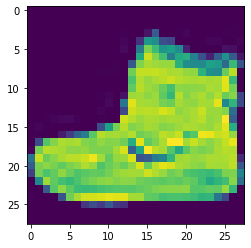

In [30]:
plt.imshow(X_train[0])

In [35]:
X_train = X_train.astype(float)/255.0
X_test  = X_test.astype(float)/255.0

In [44]:
model = Sequential()

model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3), strides = 1, padding = 'same' , activation='relu', input_shape = (28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(Dropout(0.2))

model.add(keras.layers.Conv2D(64, (3, 3),strides = 1, padding = 'same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(Dropout(0.2))

model.add(keras.layers.Conv2D(128, (3, 3),strides = 1, padding = 'same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(Dropout(0.2))


model.add(keras.layers.Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation= 'softmax'))

In [45]:
model.compile(loss= 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])

In [46]:
# Defining Early Stop method
EarlyStop = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [48]:
model_history = model.fit(X_train, Y_train, epochs = 10, batch_size = 32, validation_split = 0.2, callbacks = EarlyStop)

Epoch 1/10
1500/1500 [==============================] - 75s 50ms/step - loss: 1.2460 - accuracy: 0.5177 - val_loss: 0.7922 - val_accuracy: 0.7077
Epoch 2/10
1500/1500 [==============================] - 76s 51ms/step - loss: 0.8140 - accuracy: 0.6830 - val_loss: 0.6716 - val_accuracy: 0.7421
Epoch 3/10
1500/1500 [==============================] - 75s 50ms/step - loss: 0.7003 - accuracy: 0.7313 - val_loss: 0.5791 - val_accuracy: 0.7829
Epoch 4/10
1500/1500 [==============================] - 75s 50ms/step - loss: 0.6271 - accuracy: 0.7601 - val_loss: 0.5105 - val_accuracy: 0.8037
Epoch 5/10
1500/1500 [==============================] - 76s 51ms/step - loss: 0.5758 - accuracy: 0.7831 - val_loss: 0.4786 - val_accuracy: 0.8186
Epoch 6/10
1500/1500 [==============================] - 76s 51ms/step - loss: 0.5386 - accuracy: 0.7965 - val_loss: 0.4522 - val_accuracy: 0.8310
Epoch 7/10
1500/1500 [==============================] - 76s 51ms/step - loss: 0.5059 - accuracy: 0.8111 - val_loss: 0.4311 -

In [49]:
ev = model.evaluate(X_test,Y_test)
ev

313/313 [==============================] - 5s 14ms/step - loss: 0.3817 - accuracy: 0.8598


[0.381664514541626, 0.8597999811172485]

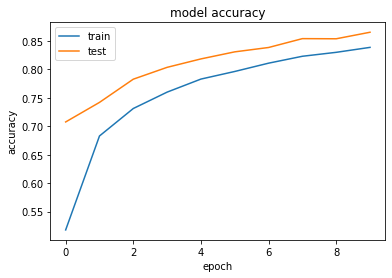

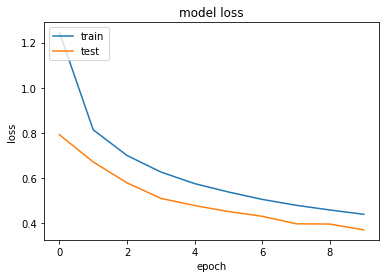

In [50]:


# summarize the history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
     